In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/POC/split manually/train_data',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 451 files belonging to 6 classes.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/POC/split manually/test_data',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 145 files belonging to 6 classes.


# Data Vitualization

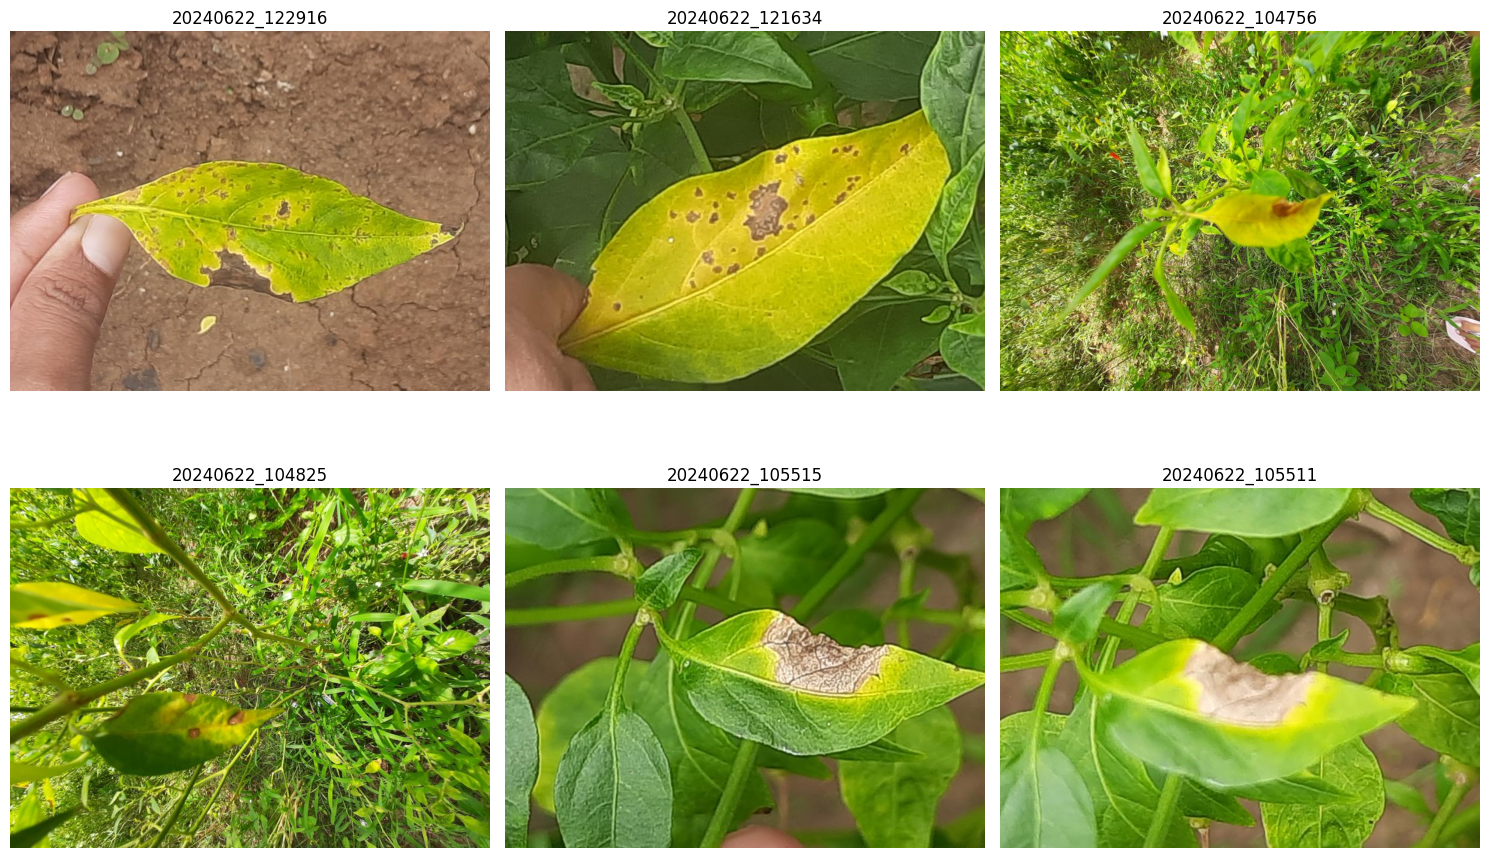

In [ ]:
# Path to the directory containing images
path = "/content/drive/MyDrive/Colab Notebooks/POC/split manually/test_data/Anthracnose"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

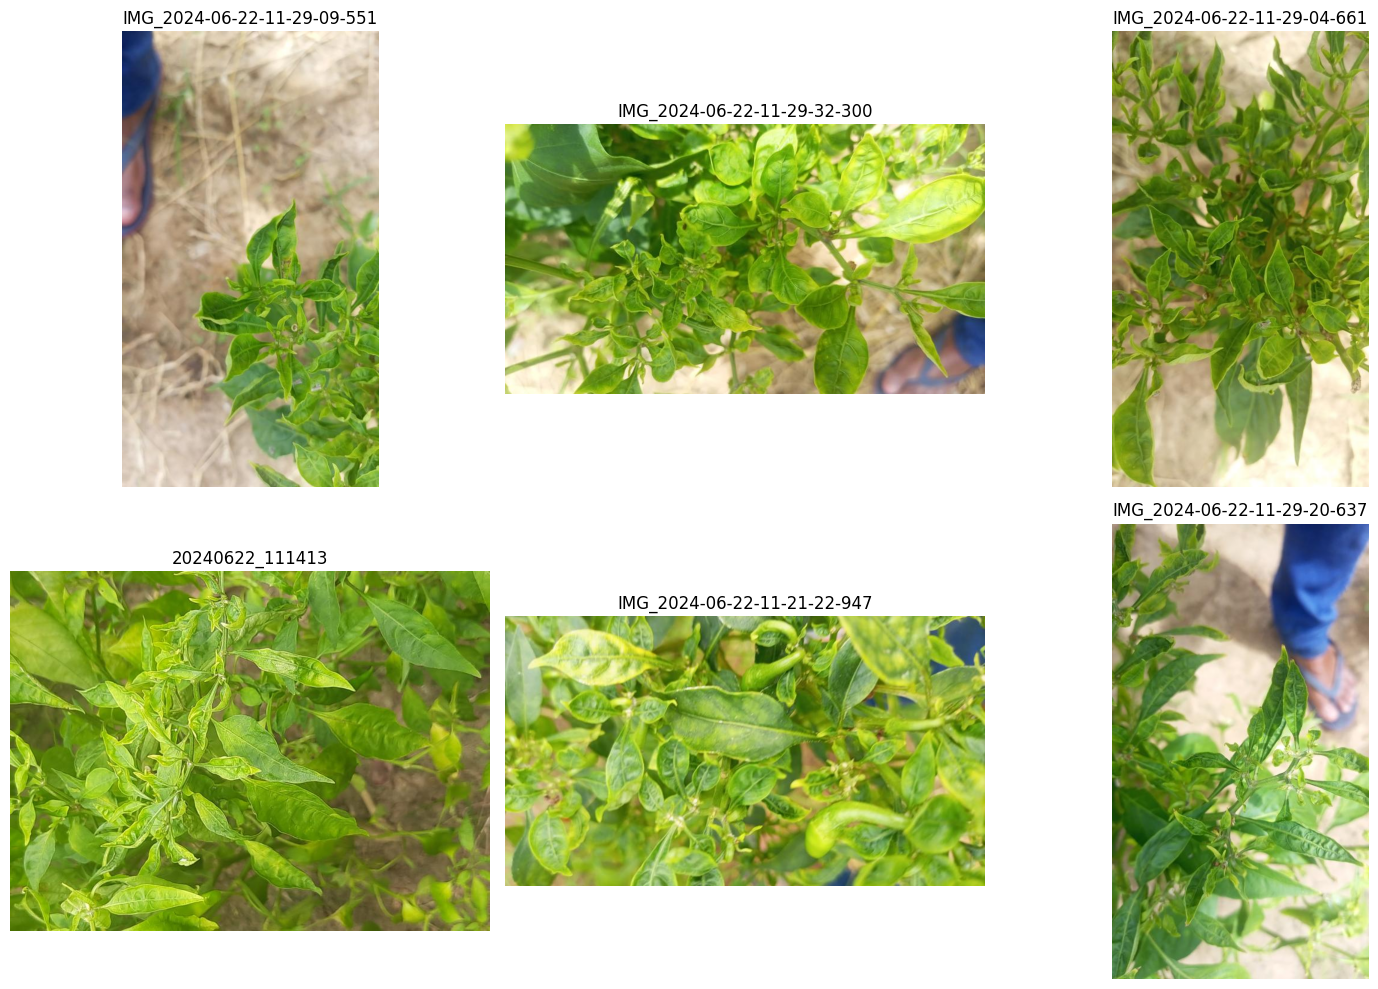

In [ ]:
# Path to the directory containing images
path = "/content/drive/MyDrive/Colab Notebooks/POC/split manually/test_data/Chilli Leaf Curl Disease"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


# Model training with CNN

In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [ ]:
conv_base.trainable = False

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Output layer for 6 classes

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[early_stopping])


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4521 - loss: 1.3778 - val_accuracy: 0.4759 - val_loss: 1.5186
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5454 - loss: 1.2941 - val_accuracy: 0.5172 - val_loss: 1.4445
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6006 - loss: 1.1107 - val_accuracy: 0.5793 - val_loss: 1.3747
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6522 - loss: 1.0100 - val_accuracy: 0.6414 - val_loss: 1.3025
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6669 - loss: 0.9667 - val_accuracy: 0.6690 - val_loss: 1.2399
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7000 - loss: 0.8865 - val_accuracy: 0.6690 - val_loss: 1.1738
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7671 - loss: 0.7692 - val_accuracy: 0.6897 - val_loss: 1.1165
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7636 - loss: 0.7968 - val_accuracy:

In [ ]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7267 - loss: 0.7577
Validation Loss: 0.6882248520851135
Validation Accuracy: 0.751724123954773


# CNN Evaluation

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
img_path = '/content/drive/MyDrive/Colab Notebooks/POC/split manually/test_data/Chilli Leaf Curl Disease/20240622_110905.jpg'
img = Image.open(img_path)
img = img.resize((256, 256))
img = np.array(img)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
prediction = model.predict(img)

# Display the prediction
print("prediction",prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predictionprediction [[0.14123428 0.00403764 0.6050813  0.18501684 0.04686413 0.01776577]]


# Vitualizing train accuracy and val accuracy

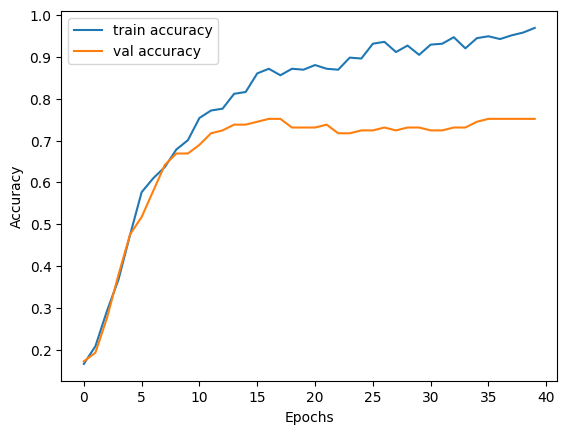

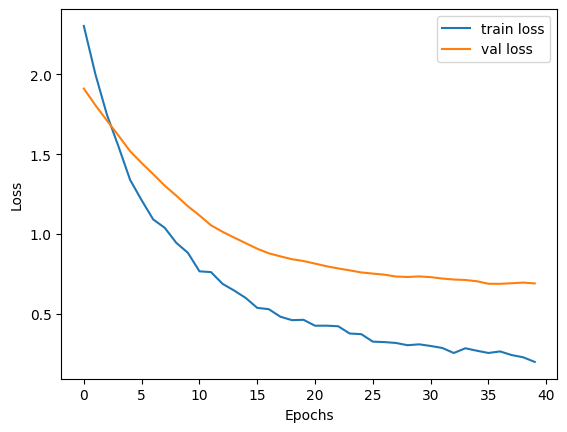

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model training with KNN

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Define the pre-trained DenseNet121 model (conv_base)
conv_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional base to prevent training
conv_base.trainable = False

# Step 2: Set up the ImageDataGenerator
dataset_dir = "/content/drive/MyDrive/Colab Notebooks/poc/poc800600/resize"  # Path to your dataset

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=15,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=15,
    class_mode='categorical',
    subset='validation'
)

# Step 3: Extract features from DenseNet121
def extract_features(generator, steps):
    features = []
    labels = []
    for _ in range(steps):
        images, labels_batch = next(generator)
        features_batch = conv_base.predict(images)  # Extract features using DenseNet121
        features.append(features_batch)
        labels.append(labels_batch)
    return np.concatenate(features), np.concatenate(labels)

# Calculate the number of steps (batches) to iterate through the entire dataset
steps_train = len(train_generator)
steps_val = len(validation_generator)

# Extract features
train_features, train_labels = extract_features(train_generator, steps_train)
val_features, val_labels = extract_features(validation_generator, steps_val)

# Flatten the features
train_features = train_features.reshape((train_features.shape[0], -1))
val_features = val_features.reshape((val_features.shape[0], -1))

# Step 4: Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, np.argmax(train_labels, axis=1))

# Step 5: Evaluate the model
knn_predictions = knn_model.predict(val_features)
knn_accuracy = accuracy_score(np.argmax(val_labels, axis=1), knn_predictions)

print("KNN Validation Accuracy:", knn_accuracy)


Found 449 images belonging to 6 classes.
Found 147 images belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━

# Model training with SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Extract features from DenseNet121
conv_base.trainable = False  # Keep DenseNet121 frozen

# Extract features from the training and validation data
def extract_features(generator, steps):
    features = []
    labels = []
    for _ in range(steps):
        images, labels_batch = next(generator)
        features_batch = conv_base.predict(images)  # Extract features
        features.append(features_batch)
        labels.append(labels_batch)
    return np.concatenate(features), np.concatenate(labels)

# Calculate the number of steps (batches) to iterate through the entire dataset
steps_train = len(train_generator)  # Total number of training batches
steps_val = len(validation_generator)  # Total number of validation batches

# Extract features
train_features, train_labels = extract_features(train_generator, steps_train)
val_features, val_labels = extract_features(validation_generator, steps_val)

# Flatten the features
train_features = train_features.reshape((train_features.shape[0], -1))
val_features = val_features.reshape((val_features.shape[0], -1))

# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(train_features, np.argmax(train_labels, axis=1))

# Step 3: Evaluate the model
svm_predictions = svm_model.predict(val_features)
svm_accuracy = accuracy_score(np.argmax(val_labels, axis=1), svm_predictions)

print("SVM Validation Accuracy:", svm_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━